In [25]:
import pandas as pd
import numpy as np
import scipy as scp
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
DATAPATH='data/'

In [4]:
data = pd.read_csv(DATAPATH+'openfoodfacts.csv',delimiter='\t',low_memory=False)

In [5]:
print(data.shape) # 681'602
print(data["code"].value_counts().count()) # 681533
print(data["manufacturing_places_tags"].value_counts().count()) # 11731
print(data["manufacturing_places"].value_counts().count()) # 12884
print(data["categories"].value_counts().count()) # 62746
print(data["origins_tags"].value_counts().count()) # 6606

data.head()

(665697, 174)
665659
11446
12534
61613
6490


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#fasters than pd.Series.corr(...)
def correlation_columns(column1,column2):
    matrix=data[[column1,column2]].dropna().values
    return scp.stats.spearmanr(matrix[:,0],matrix[:,1])

In [7]:
#example of use of the correlation function
print(correlation_columns('energy-from-fat_100g','fat_100g'))
print(correlation_columns('energy_100g','fat_100g'))
print(correlation_columns('energy_100g','energy-from-fat_100g'))
print(correlation_columns('energy_100g','salt_100g'))
print(correlation_columns('salt_100g','fat_100g'))

SpearmanrResult(correlation=0.9642065075130063, pvalue=0.0)
SpearmanrResult(correlation=0.7276323408917151, pvalue=0.0)
SpearmanrResult(correlation=0.7673307503853053, pvalue=2.085739219717803e-177)
SpearmanrResult(correlation=0.11789138476826279, pvalue=0.0)
SpearmanrResult(correlation=0.3325211853717805, pvalue=0.0)


# Get rid of dupplicates

In [8]:
# Check values thave haveno code value. 
null_code = data[pd.isnull(data['code'])].shape[0]
print(null_code)
start_dummy_code = 10000000000000
end_dummy_code = 10000000000000+null_code
dummy_code = list(range(start_dummy_code,end_dummy_code+1))


for i,row in enumerate(data[pd.isnull(data['code'])].index):
    data.loc[[row],['code']] = dummy_code[i]


34


In [9]:
# investigate duplicates. 
data[data.duplicated(subset=['code'],keep=False)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
391448,3480580000121,http://world-en.openfoodfacts.org/product/3480...,kiliweb,1534144276,2018-08-13T07:11:16Z,1537180124,2018-09-17T10:28:44Z,Arachides sucrees,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391449,3480580000121,http://world-en.openfoodfacts.org/product/3480...,kiliweb,1534144276,2018-08-13T07:11:16Z,1539357604,2018-10-12T15:20:04Z,Arachides Sucrées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421916,3596701440535,http://world-en.openfoodfacts.org/product/3596...,openfoodfacts-contributors,1537044583,2018-09-15T20:49:43Z,1537045183,2018-09-15T20:59:43Z,blanc de dinde,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421917,3596701440535,http://world-en.openfoodfacts.org/product/3596...,openfoodfacts-contributors,1537044583,2018-09-15T20:49:43Z,1537045244,2018-09-15T21:00:44Z,blanc de dinde,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441055,3700446410957,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1537012708,2018-09-15T11:58:28Z,1537174585,2018-09-17T08:56:25Z,myrtille bio,NaN,118g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441056,3700446410957,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1537012708,2018-09-15T11:58:28Z,1537174704,2018-09-17T08:58:24Z,myrtille bio,NaN,118g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559773,6003326008341,http://world-en.openfoodfacts.org/product/6003...,beniben,1537967806,2018-09-26T13:16:46Z,1537970130,2018-09-26T13:55:30Z,Pilsener,Beer - Pilsener,330 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559774,6003326008341,http://world-en.openfoodfacts.org/product/6003...,beniben,1537967806,2018-09-26T13:16:46Z,1537970162,2018-09-26T13:56:02Z,Pilsener,Beer - Pilsener,330 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop duplicates, set index, and check if ok. 
data = data.drop_duplicates(subset=['code'],keep="first")
data.set_index('code',inplace=True)
data.index.is_unique

True

In [11]:
data.to_csv(DATAPATH+"/cleaned_unique_index.csv")

food origin

In [12]:
a = ~data["first_packaging_code_geo"].isnull() # 27572
b = ~data["origins_tags"].isnull()
c = ~data["manufacturing_places_tags"].isnull()

sele = a|b|c  # 88001

data_loc = data[sele] # 88001 
print(data_loc.shape)
# data_loc = data_loc[sele]
data_loc[["origins_tags","origins_tags","manufacturing_places_tags"]].to_csv(DATAPATH+'food_origins.csv')

(86142, 173)


set for palm oil

In [13]:
palm_oil = []
for col in data.columns:
    ## keep columns that have info about palm oil.. 
    if ("palm_oil") in col:
        palm_oil.append(col)

# Drop rows that have absolutely no information about palm_oil.         
palm_oil_data = data.dropna(how='all',subset=palm_oil)[palm_oil]
palm_oil_data.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags
code,,,,,,
0000000001199,0.0,NaN,NaN,0.0,NaN,NaN
0000000001663,0.0,NaN,NaN,0.0,NaN,NaN
0000000002264,0.0,NaN,NaN,0.0,NaN,NaN
0000000003827,0.0,NaN,NaN,0.0,NaN,NaN
0000000004510,0.0,NaN,NaN,0.0,NaN,NaN


In [14]:
palm_oil_data.to_csv(DATAPATH+'palm_oil.csv',columns=palm_oil_data.columns,index=True)

set for labels

In [15]:
labels =[]
for col in data.columns:
    #isolate columns with info about labels. 
    if ("labels") in (col):
        labels.append(col)
print("Columns for label : " + str(labels))

# drop articles with no info about labels.
labels_data = data.dropna(how='all',subset=labels)[labels]
labels_data.head()


Columns for label : ['labels', 'labels_tags', 'labels_en']


,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [16]:
labels_data.to_csv(DATAPATH+'labels.csv',columns=labels_data.columns,index=True)

set for vegan

In [17]:
data_=data.dropna(subset=['labels_tags'])
#keeping only vegan labelled data, removing the non-vegan or no-vegan labelled
vegan_data=data_[data_['labels_tags'].str.contains('vegan').fillna(False) & (~ data_['labels_tags'].str.contains('no-vegan').fillna(False)) ]
del data_

In [19]:
vegan_data.to_csv(DATAPATH+'vegan.csv',columns=vegan_data.columns,index=True)

# Palm Oil

## Exploring the number of aliments that contain palm oil

In [20]:
total_count = data.size
palm_oil_count = palm_oil_data.size
percentage = palm_oil_count / total_count * 100

print("We have a total of %d articles entered" % total_count)
print("Out of those we have information about palm oil on %d articles " % palm_oil_count)
print("This represents %f %% " % percentage)

We have a total of 115164889 articles entered
Out of those we have information about palm oil on 2327766 articles 
This represents 2.021246 % 


- While this amount seems a bit low it is still more than half articles. We remove from our study all articles that we do not have information about as they could make future analysis biased. The sample of size 387964 is still a fairly large sample size that we can make some statistical analysis on

In [21]:
palm_oil_data.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags
code,,,,,,
0000000001199,0.0,NaN,NaN,0.0,NaN,NaN
0000000001663,0.0,NaN,NaN,0.0,NaN,NaN
0000000002264,0.0,NaN,NaN,0.0,NaN,NaN
0000000003827,0.0,NaN,NaN,0.0,NaN,NaN
0000000004510,0.0,NaN,NaN,0.0,NaN,NaN


In [22]:
contains_palm = palm_oil_data[palm_oil_data['ingredients_from_palm_oil_n'] > 0.0]
may_contain_palm = palm_oil_data[palm_oil_data['ingredients_that_may_be_from_palm_oil_n'] > 0.0]
contains_palm['count'] = 1
may_contain_palm['count'] = 1

D:\Anaconda\envs\ada\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\envs\ada\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
contains_palm.index.difference(may_contain_palm.index)
# This can be useful to see that there is some correlation between may_contain <->contains

Index(['0000000290616', '0000069006562', '00023092', '00035460', '00052283',
       '00087728', '00088749', '00096225', '00099202', '00101356',
       ...
       '9556085735739', '9556121020164', '9556417639339', '9556439887497',
       '9556587103869', '96121283', '9714176130355', '98152056', '98797554',
       '99515874'],
      dtype='object', name='code', length=8229)

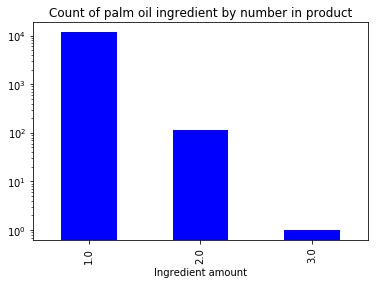

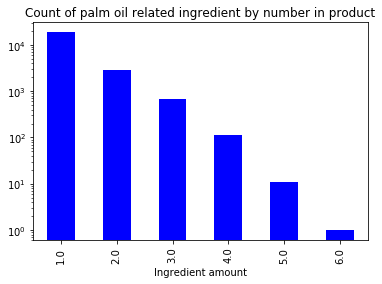

In [26]:
## Group by how many ingredients contain palm oil. and may contain. 
count_palm = contains_palm.groupby("ingredients_from_palm_oil_n")['count'].count()
count_may = may_contain_palm.groupby("ingredients_that_may_be_from_palm_oil_n")['count'].count()
count_palm.plot.bar(logy=True,title="Count of palm oil ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()
count_may.plot.bar(logy=True,title="Count of palm oil related ingredient by number in product",color='b')
plt.xlabel("Ingredient amount")
plt.show()

- We can see that that most of the product seem to have only one ingredient or two that are related to palm oil
- However the product that may contains palm oil can have a little more ingredients. 

There is 11768 articles that contain palm oil.
There is 22433 articles that may contain palm oil 
The correlation between food that contains palm oil and that may contains palm oil is 0.193331 


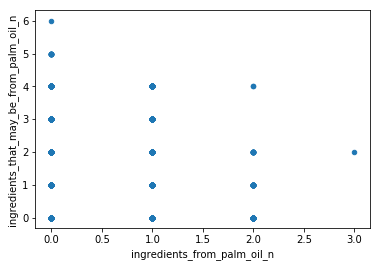

In [27]:
## One can wonder how much this represents in terms of relations. 
cnt_palm = contains_palm.shape[0] 
may_cnt_palm = may_contain_palm.shape[0]
print("There is %d articles that contain palm oil."%cnt_palm)
print("There is %d articles that may contain palm oil "%may_cnt_palm)
correlation = data["ingredients_from_palm_oil_n"].corr(data["ingredients_that_may_be_from_palm_oil_n"],method="pearson")
print("The correlation between food that contains palm oil and that may contains palm oil is %f " % correlation)

data.plot.scatter(x="ingredients_from_palm_oil_n",y="ingredients_that_may_be_from_palm_oil_n")
plt.show()

<p> We can't infer much as the scatter plots are not very helpful in visualize the data. Nut we can see that the correlation is low (less than 0.2) so there is not much relation between the number of ingredients and how many may contain palm oil.  </p>

## Origin of food

In [47]:
food_origin = pd.read_csv(DATAPATH+"food_origins.csv")
food_origin.set_index("code", inplace=True)
food_origin.head()

,origins_tags,origins_tags.1,manufacturing_places_tags
code,,,
0000000020114,NaN,NaN,france
0000000274722,france,france,france
0000000290616,quebec,quebec,brossard-quebec
0000000394710,quebec,quebec,brossard-quebec
0000001071894,france,france,united-kingdom


In [48]:
# Let us see first how much data we have available..
contains_palm.join(food_origin).shape[0], contains_palm.shape[0],food_origin.shape[0]

(11768, 11768, 86142)

In [50]:
## these operations are done to map the origin and do a value count on the origin..
joined = contains_palm.join(data["origins"],how='inner').dropna(subset=["origins"])
# this simulates flatmap ( explode from spark ) 
flatmap = joined["origins"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()

flatmap.columns = ["origins"]
flatmap = flatmap.reset_index().set_index("code")
flatmap = flatmap[["origins"]]
flatmap = flatmap["origins"].value_counts()
# only take the ten most significant. 
top_ten = flatmap[flatmap > 5]

- We notice that a lot of places seem to be from france. But we cant really see the trend as it is often in a bad format.

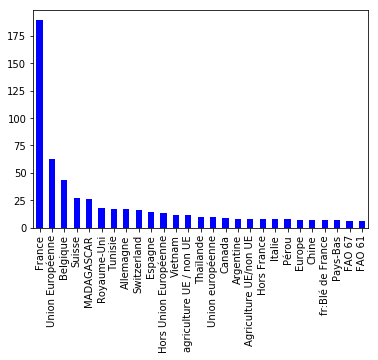

In [53]:
top_ten.plot.bar(color='b')

- Note that this is not 100% representative as the database is french so there are more products that come from France that are logged. 
- Todo : check by standardization of values..

## Categories of aliment. 

we now investigate what time of aliments are more likely to contain palm oil. This can help future shoppers to be more wary around these type of articles and also helps us understand where the need for palm oil is the biggest.

In [55]:
join_categories = palm_oil_data.join(data["main_category_en"],how="inner").dropna(subset=["main_category_en"])
join_categories.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,main_category_en
code,,,,,,,
0000000005470,0.0,NaN,NaN,0.0,NaN,NaN,Plant-based foods and beverages
0000000020114,0.0,NaN,NaN,0.0,NaN,NaN,Dietary supplements
0000000274722,0.0,NaN,NaN,0.0,NaN,NaN,Meals
0000000290616,1.0,NaN,huile-de-palme,0.0,NaN,NaN,Plant-based foods and beverages
0000000394710,0.0,NaN,NaN,1.0,NaN,huile-vegetale,Sugary snacks


- Unfortunately this subset is a bit to small to work with.. let us try to expand to all categories. 

In [56]:
categories_contains = contains_palm.join(data["categories"],how="inner").dropna(subset=["categories"])
categories_may_contain = may_contain_palm.join(data["categories"],how="inner").dropna(subset=["categories"])

In [57]:
categories_may_contain.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,count,categories
code,,,,,,,,
0000000394710,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries"
0000008237798,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,Quiches lorraines
0000010206515,1.0,NaN,huile-de-palme,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,"Pâtes à sucre,Décorations,fr:Confiseries"
0000040144078,0.0,NaN,NaN,1.0,NaN,huile-vegetale,1,"Snacks sucrés,Confiseries,Confiseries chocolat..."
0000069160028,0.0,NaN,NaN,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,Desserts glacés


In [58]:
categories_contains.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,count,categories
code,,,,,,,,
0000000290616,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,Légumes-feuilles
0000010206515,1.0,NaN,huile-de-palme,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,1,"Pâtes à sucre,Décorations,fr:Confiseries"
0000069006562,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,"Surgelés,Rostis,Plats préparés surgelés"
00023092,1.0,NaN,huile-de-palme,0.0,NaN,NaN,1,"Cookies,Cookies aux noix de pécan"
00027083,1.0,NaN,huile-de-palme,3.0,NaN,"e481-stearoyl-2-lactylate-de-sodium,e472e-este...",1,Muffins à la myrtille


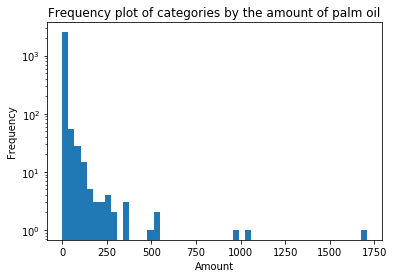

In [59]:
abc = categories_contains["categories"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()#.reset_index().set_index("code").groupby("0")
abc.columns = ["categories"]
hi = abc.reset_index().set_index("code")["categories"].value_counts()
hi.plot.hist(bins=50,logy=True,title="Frequency plot of categories by the amount of palm oil")
plt.xlabel("Amount")
plt.show()

- One might wonder what are the biggest categories in term of palm oil consumption !

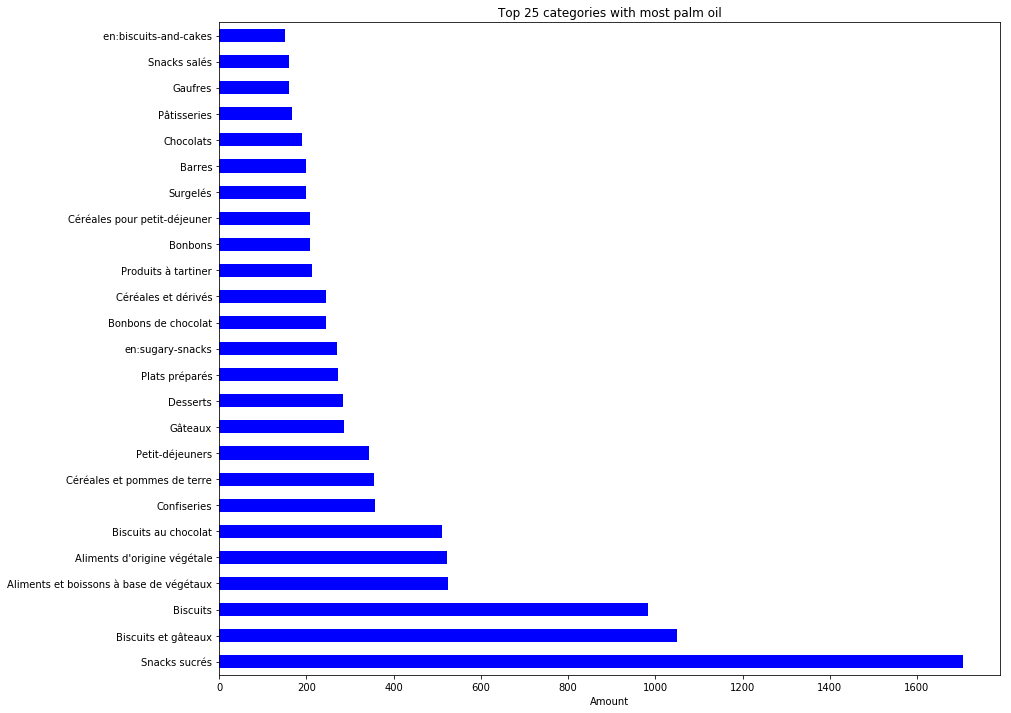

In [60]:
hi.nlargest(25).plot.barh(figsize=(14,12),color='b',title="Top 25 categories with most palm oil")
plt.xlabel("Amount")
plt.show()

- From this analysis we can see that most products that contain palm oil seem to be sweets and cookie derivated products. So if you want to help the Amazon you should be extra careful around sweet snacks. 

## Timeline of palm oil

- Now we want to investigate the tendency over time of products containing palm oil. If there is more or less of them over time. To do this we will refer to the first time they were added to the database, and see if more products that contain palm oil have been added lately. 

In [64]:
data["created_datetime"] = pd.to_datetime(data["created_datetime"],errors="coerce")
dateparsed = data[data["created_datetime"].notnull()]

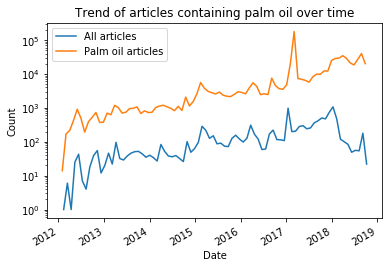

In [65]:
palm_dated = contains_palm.join(dateparsed["created_datetime"],how='inner')
palm_dated = palm_dated[["created_datetime"]].reset_index().set_index("created_datetime")#["code"].value_counts().to_frame()

palm_dated["count"] = 1
palm_dated = palm_dated["count"].resample("30D").sum()
palm_dated.plot.line(title="Trend of articles containing palm oil over time",logy=True)



total_dated = dateparsed[["created_datetime"]].reset_index().set_index("created_datetime")
total_dated["count"] = 1
total_dated = total_dated["count"].resample("30D").sum()
total_dated.plot.line(logy=True)

plt.legend(["All articles","Palm oil articles"])
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

<p> We can see there are a few spikes that are explained as a user entering many different types of articles. Therefore there are not very statistically interesting. </p>

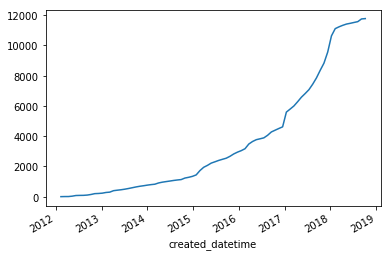

In [66]:
palm_dated.cumsum().plot.line()

<p> Here we notice a trend that is quadratic. So there seems to be more and more articles containing palm oil. </p>

# Vegan

In [28]:
vegan_data.head()
origin_lists=vegan_data.origins_tags.dropna().str.split(',')
origin_exploded=origin_lists.apply(pd.Series).unstack()
del origin_lists

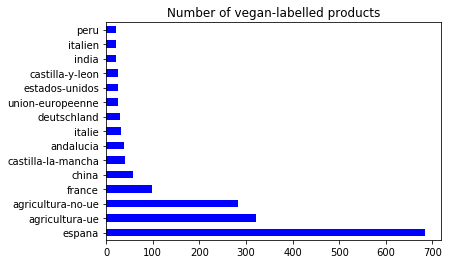

In [61]:
origin_exploded.value_counts().head(15).plot.barh(color='b')
plt.title('Number of vegan-labelled products')
plt.show()

In [35]:
total_origins=data.origins_tags.dropna().str.split(',')
total_origins_exploded=total_origins.apply(pd.Series).unstack()


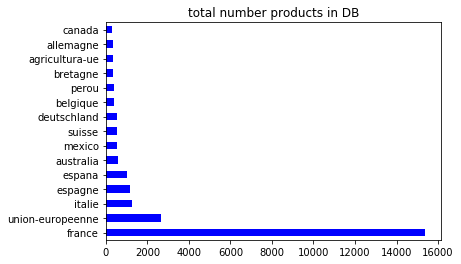

In [62]:
total_origins_exploded.value_counts().head()
total_origins_exploded.value_counts().head(15).plot.barh(color='b')
plt.title('total number products in DB')
plt.show()


In [38]:
vegan_origin_df=origin_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)
total_origin_df=total_origins_exploded.to_frame().reset_index().drop(labels=['level_0'],axis=1)

In [39]:
total_origin_df.columns=['level_1','origin']
total_origin_df=total_origin_df.dropna()
total_count=total_origin_df.groupby(by=['origin']).size().sort_values(ascending=False).to_frame()
vegan_origin_df.columns=['level_1', 'vegan_loc']
vegan_count=vegan_origin_df.groupby(by=['vegan_loc']).size().to_frame()
comparison=pd.merge(total_count,vegan_count,right_index=True,left_index=True,how='inner')


## Comment on data

The origins_tags series is messy.

First of all, same country entries are in different languange. The first approach is to deal with similar strings clustering: put together italy, italia and italien, but it would not work for austria osterreich as well as Germany Allemagne and Republica Federale Tedesca.

Another problem is the bias of the data base: it is a french data base, so will have more entries and more details for product from France, and frome Europe in a lower extend. To overcome that problem, we want to compare countries by their relative vegan production (vegan labelled production from one origin_tag over total production from the same).

But this solution shows a third problem: irrelevent tags. Some tags are to precise: regions or province, or even wrong ('soja' is not a country). For these tags are very rare, it is possible to have a confidence (the ratio that we talked about) of 100%: for instance, there is only one product tagged 'zamora-provincia' and this product is also tagged vegan, then 'zamora-provincia' will be the "vegan champion", but this is irrelevant to compare a precise province with entire country.

We addressed that last problem by thresholding the support (at 100 labbeled products), so we are sure to retrieve frequent countriews in the DB. Also we manually removed too general labelled because those can have a high support as well ('eu').

In [40]:
relevent_index=['aceitunas', 'afrique', 'agadir', 'agypten', 'alava', 'albacete-provincia', 'albatera', 'alemania', 'alicante', 'alicante-provincia', 'allemagne', 'almendras', 'almeria-provincia', 'almunecar', 'alps', 'amandes-d-italie', 'amazonas', 'amazonie', 'america-del-sur', 'amerique', 'amerique-centrale', 'amerique-du-nord', 'amerique-du-sud', 'andalucia', 'andes', 'angleterre', 'angleterre-betterave', 'aragon', 'aranjuez', 'argelia', 'argentina', 'argentinien', 'arroz', 'asie', 'asie-pour-le-fruit-de-moines', 'asturias', 'atlantico-suroeste', 'australia', 'austria', 'autol', 'autriche', 'avoine-francaise', 'azucar', 'azur-quelle', 'bajo-aragon', 'bali', 'batata', 'belgica', 'belgien', 'belgium', 'bolivia', 'bolivie', 'bolivien', 'bosnien-herzegowina', 'brazil', 'bresil', 'bretagne', 'burkina-faso', 'cacahuetes', 'cacao', 'caceres-provincia', 'cadiz-provincia', 'caldes-de-malavella', 'calera-y-chozas', 'california', 'californie', 'camargue', 'cambrils', 'cana-de-azucar', 'canada', 'casas-de-haro', 'castilla-la-mancha', 'castilla-y-leon', 'cataluna', 'cevennes', 'chile', 'china', 'chine', 'chufa', 'ciego-montero', 'cienfuegos', 'ciruelas', 'ciudad-real-provincia', 'col', 'col-lombarda', 'colombia', 'columbia', 'commerce-equitable', 'comunidad-valenciana', 'conil-de-la-frontera', 'cordoba-provincia', 'corea', 'costa-de-galicia', 'costa-de-marfil', 'costa-rica', 'cuba', 'cuenca-provincia', 'desconocido', 'deutschland', 'dominikanische-republik', 'e-u-a', 'ecuador', 'egipto', 'egnil', 'egypte', 'el-bolson', 'el-mirador', 'equateur', 'esmeraldas', 'espagne', 'espana', 'estados-unidos', 'etats-unis','eutschland', 'extremadura', 'filderstadt', 'filipinas', 'fontanilles', 'fougerolles', 'france', 'francia', 'frankreich', 'fresas', 'fuera-de-espana', 'galicia', 'gard', 'garray', 'germany', 'gerona-provincia', 'gers', 'gers-en-france-pour-le-ble', 'ghana', 'girona', 'golfo-de-vizcaya', 'granada-provincia', 'grece', 'grecia', 'greece', 'griechenland', 'guadalajara-provincia', 'haiti', 'haute-provence', 'herefordshire', 'holanda', 'hongrie','huelva-provincia', 'inde', 'india', 'indien', 'indien-landwirtschaft', 'indonesia', 'indonesie', 'indonesien', 'industria-argentina', 'ingrediente-s', 'iran', 'ireland', 'islas-canarias', 'israel', 'italia', 'italie', 'italien', 'italy', 'jaen', 'japon', 'jativa', 'kanada', 'kenia', 'kirgistan', 'kolumbien', 'la-coruna-provincia', 'la-mancha-comarca', 'la-manchuela-comarca', 'la-montiela-pedania', 'la-orotava', 'la-rioja', 'leimuiden', 'leinfelden-echterdingen', 'lerida-provincia', 'lombardia', 'lomellina', 'madagascar', 'madrid-comunidad-autonoma', 'malaga-provincia', 'malaui', 'manantial-amer-palatin', 'manantial-bezoya-de-trescasas', 'manantial-font-sacalm', 'manantial-fuente-primavera', 'manantial-fuentevera', 'manantial-siguenza', 'manantial-vichy-catalan', 'marinaleda', 'marruecos', 'mazarron', 'melocotones', 'mexico', 'mexiko', 'mexique', 'midlands-de-l-ouest', 'milano', 'minglanilla', 'minho-lima', 'modena', 'montricoux', 'montseny', 'moratilla-de-henares', 'motril', 'munchsteinach', 'murcia', 'murcia-comunidad-autonoma', 'mures-des-pays-bas', 'myrtilles-du-maroc', 'nao-ue', 'nardo', 'navarra', 'niederosterreich', 'niger', 'nijar','nueva-zelanda', 'osterreich', 'pais-vasco', 'pakistan', 'palmira', 'papua-neuguinea', 'paraguay', 'pavia-provincia', 'pays-bas', 'pepinillos', 'perou', 'peru', 'philippinen', 'philippines', 'pichincha-provincia', 'piemont', 'pioz', 'plano-tx', 'poland', 'polonia', 'portugal', 'quintanar-del-rey', 'regiao-do-norte', 'region-centro-norte', 'reino-unido', 'remolacha-y-zanahoria', 'republica-dominicana', 'republique-dominicaine', 'requena', 'requena-utiel-comarca', 'rheinland', 'ribera-del-jalon-comarca', 'rice', 'rio-negro', 'riz', 'romania', 'roumanie', 'royaume-uni', 'rugen', 'rumanien', 'salamanca-provincia', 'san-antonio-requena', 'sant-hilari-sacalm', 'santa-cruz-de-tenerife-provincia', 'santaella', 'santo-domingo', 'santo-tome-y-principe', 'sao-tome', 'sao-tome-und-principe', 'schweden', 'segovia-provincia', 'selva-comarca', 'serbia', 'sevilla-provincia', 'sicile', 'sierra-de-gredos', 'siguenza', 'slowakei', 'soja', 'soja-bio', 'soja-de-france', 'soja-de-francia', 'soja-europeen', 'soja-origine-france', 'soja-sud-est', 'soria-provincia', 'south-africa', 'south-africa-local-and-imported', 'spain', 'spanien', 'sri-lanka', 'sud-est-de-la-france', 'sud-ouest', 'sud-ouest-de-la-france', 'sudafrica', 'sudafrika', 'sudamerica', 'sudamerika', 'suisse', 'switzerland', 'tailandia', 'tanzania', 'tanzanie', 'tarn-et-garonne', 'tarragona-provincia', 'thailand', 'thailande', 'toledo-provincia', 'tomates', 'tozeur', 'trentino-alto-adigio', 'trescasas', 'trinidad', 'trinidad-und-tobago', 'tunesien', 'tunez', 'tunisia', 'tunisie', 'turkei', 'turquia', 'turquie', 'uca', 'ucrania', 'ue', 'ue-non-ue', 'uganda', 'ukraine',  'united-kingdom', 'united-states', 'united-states-of-america', 'usa', 'usa-and-other-unspecified-countries', 'val-venosta', 'valencia', 'valencia-provincia', 'valladolid-provincia', 'vancouver-bc', 'various', 'venezie', 'venezuela', 'verin', 'viana-do-castelo', 'viana-do-castelo-distrito', 'vietnam', 'villa-del-prado', 'villalgordo-del-jucar', 'villamalea', 'villanueva-de-la-jara', 'waldviertel', 'west-indies', 'wiesbaum', 'yuca', 'zamora-provincia', 'zaragoza-provincia' ] 
relevent_comparison=comparison.loc[relevent_index]
relevent_comparison=relevent_comparison[relevent_comparison['0_x']>100]
del relevent_index

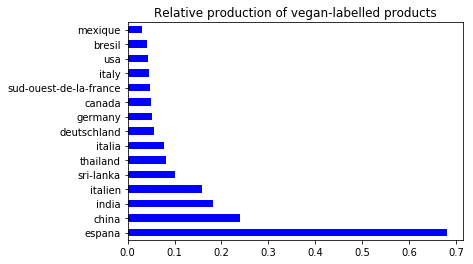

In [63]:
relevent_comparison['ratio']=relevent_comparison['0_y']/relevent_comparison['0_x']
relevent_comparison.ratio.sort_values(ascending=False).head(15).plot.barh(color='b')
plt.title('Relative production of vegan-labelled products')
plt.show()

## Comment on observations

Spain is the country that produce the higher part of vegan product relatively to its total production.
A solution is to check the categories

In [44]:
vegan_data["created_datetime"] = pd.to_datetime(vegan_data["created_datetime"],errors="coerce")
dateparsed = vegan_data[vegan_data["created_datetime"].notnull()]
vegan_date=dateparsed.reset_index().set_index('created_datetime')

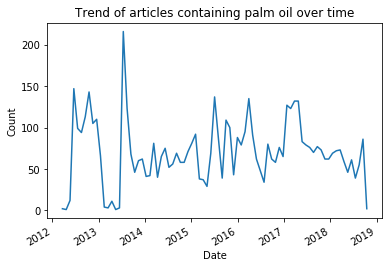

In [45]:
vegan_date["count"] = 1
vegan_date = vegan_date["count"].resample("30D").sum()
vegan_date.plot.line(title="Trend of articles containing palm oil over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

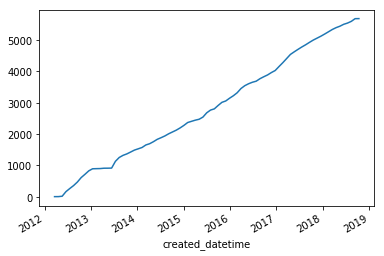

In [46]:
vegan_date.cumsum().plot.line()
plt.show()

The total ammount of vegan products increases in a linear was, suggesting that the rate of vegan produced food is consant.

# EcoLabels

In [68]:
data = pd.read_csv(DATAPATH+'labels.csv',delimiter=',',low_memory=False)
data.set_index('code',inplace=True)
data.shape

(99655, 3)

In [70]:
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)
data_total.set_index('code',inplace=True)

In [71]:
data.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [72]:
# We do a 'flatmap' trick...
label_flatted = data["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted

0
   code                                          
0  0000000020114                   Made in France
   0000000274722              fr:Viande Française
   0000003444009                    Contains GMOs
   0000005200016                          Organic
   0000007020254                           Kosher
   0000007730009                        Green Dot
   0000007933929                    Contains GMOs
   0000009125124                        Green Dot
   0000009336247            No artificial flavors
   0000010206515                      Gluten-free
   0000012345878          Incorrect data on label
   0000020004552  Not advised for specific people
   0000020424640              Sustainable farming
   0000030053014                  Low or no sugar
   0000034054086                    Contains GMOs
   0000040144078                    Contains GMOs
   0000050157846                       Vegetarian
   0000084154071                       Vegetarian
   0000087157635                 No preservatives
   0000101209159                    Palm oil free
   000030                               Green Dot
   000031                               Green Dot
   000039365                           Vegetarian
   000039681                           Vegetarian
   0000460938714                       Vegetarian
   000050                               Green Dot
   000051                               Green Dot
   00005401                               Organic
   0001126220                           Green Dot
   00011501                            Point-vert
...                                           ...
20 3392780007001                 Carbon footprint
   3664037000012                       No lactose
   3664037000029                          No GMOs
   3700067371248                        fr:Triman
   3700214610046                 Carbon footprint
   5054269137583                             Salt
   8412800005888                 Vitamin D source
   8412800005895                 Vitamin D source
   8412800005901      es:Bajo-en-grasas-saturadas
21 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000012                          No milk
   3664037000029                       No lactose
   3700214610046                 Carbon footprint
   5054269137583                  Tartaric-acid-l
   8412800005888      es:Bajo-en-grasas-saturadas
   8412800005895      es:Bajo-en-grasas-saturadas
22 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000012     fr:AB Agriculture Biologique
   3664037000029                The Vegan Society
   3700214610046                 Carbon footprint
   5054269137583                          Thiamin
23 3392780002648                 Carbon footprint
   3392780007001                 Carbon footprint
   3664037000029     fr:AB Agriculture Biologique
   5054269137583            Thickener-xanthan-gum
24 5054269137583                            Water
25 5054269137583          Wheat-flour-wheat-flour
26 5054269137583                            Yeast

[261459 rows x 1 columns]

In [73]:
label_flatted.columns = ["labels"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels"]]

In [74]:
label_flatted = label_flatted[["labels"]]
label_flatted.head()

,labels
code,
0000000020114,Made in France
0000000274722,fr:Viande Française
0000003444009,Contains GMOs
0000005200016,Organic
0000007020254,Kosher


In [75]:
organic = label_flatted[label_flatted["labels"].str.contains("Organic")]
organic = organic[~organic.index.duplicated()] ## We don't want to many. 

In [76]:
cnt_organic = organic.shape[0]
total_cnt = data_total.shape[0]
percentage = cnt_organic / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage)

There are 37395 articles with label organic
This represents 0.056175 % of articles 


In [77]:
bio = label_flatted[label_flatted["labels"].str.contains("Bio")]
bio = bio[~bio.index.duplicated()] ## We don't want to many. 
bio

,labels
code,
0018627740001,Bio
0221109418736,it:Bio
02516101,fr:Biogroupe
0621456277183,fr:Biologique-avec-legumes
11044204,fr:Bio7
11304915,Bio
13294803,Bio
15667496,fr:Bio-organic
2000000020926,Bio


In [78]:
cnt_organic = organic.shape[0]
cnt_bio = bio.shape[0]
total_cnt = data_total.shape[0]
percentage_organic = cnt_organic / total_cnt
percentage_bio = cnt_bio / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage_organic)
print("There are %d articles with label bio" % cnt_bio)
print("This represents %f %% of articles " % percentage_bio)

There are 37395 articles with label organic
This represents 0.056175 % of articles 
There are 13886 articles with label bio
This represents 0.020859 % of articles 


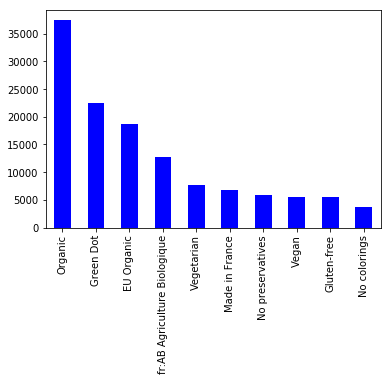

In [79]:
label_flatted["labels"].value_counts().nlargest(10).plot.bar(color='b')
plt.show()

- We can see that the most popular label is organic, there are also a lot of articles having the green dot label which is depicted below for people who do not know what it is. 
- In order here are the most popular labels, unfortunately having an organic label is not a real label. It is a wide concept. Agriculture biologique is a french label. 
<img src="img/eu_organic.jpg" alt="EU Organic">
<img src="img/green_dot.svg" alt="Green Dot">
<img src="img/agri_bio.png" alt="Agriculture biologique">

- We now focus on those three mentionned label to see where we can find them most. 

In [80]:
top_4 = label_flatted["labels"].value_counts().nlargest(4)
top_4 = list(top_4.index)
top_4_articles = label_flatted[label_flatted["labels"].apply(lambda r : r in top_4)]

In [81]:
top_4_all = top_4_articles.join(data_total["origins"], how="inner",lsuffix="l",rsuffix="r").dropna(subset=["origins"])
top_4_all.head()

,labels,origins
code,,
00028202,Green Dot,Royaume-Uni
00035460,Green Dot,Vietnam
00042611,Organic,?
00042611,EU Organic,?
00042611,fr:AB Agriculture Biologique,?


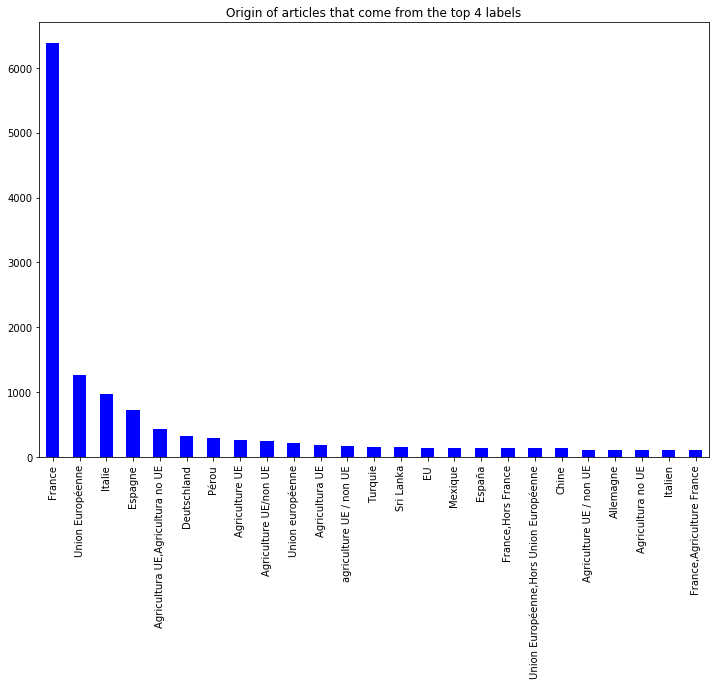

In [82]:
top_4_all["origins"].value_counts().nlargest(25).plot.bar(figsize=(12,8),title="Origin of articles that come from the top 4 labels",color='b')

- We can see that most products come from France however there are a number of articles that come way further than france, it will be interesting to see to study where they are being sold, but this will be done in depth in an other study. 